I am attempting to predict percipitation amounts based on meterorological variables such as cloud cover, wind speeds and humidity, etc. This is a regression problem since we are predicting a numerical value (precipitation amount). The Dataset was obtained from https://www.kaggle.com/datasets/thedevastator/weather-prediction . I am trying to predict the amount of precipitation (RR) in 10 mm increments. The metric we plan to use to measure the performance of our model is Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).


Data Preparation

In [ ]:
# load in the data and necessary libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')
weather = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/CS_167_Datasets/weather_prediction_dataset.csv')
weather.head()

# Display basic information about the dataset
print(weather.info())

# Display descriptive statistics for numerical columns
print(weather.describe())

# Check for any missing values
print(weather.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB
None
               DATE        MONTH  BASEL_cloud_cover  BASEL_humidity  \
count  3.654000e+03  3654.000000        3654.000000     3654.000000   
mean   2.004568e+07     6.520799           5.418446        0.745107   
std    2.874287e+04     3.450083           2.325497        0.107788   
min    2.000010e+07     1.000000           0.000000        0.380000   
25%    2.002070e+07     4.000000           4.000000        0.670000   
50%    2.004567e+07     7.000000           6.000000        0.760000   
75%    2.007070e+07    10.000000           7.000000        0.830000   
max    2.010010e+07    12.000000           8.000000        0.980000   

       BASEL_pressure  BASEL_global_radiation  BASEL_p

In [ ]:
# Split the data into the training data and testing data

target= 'BASEL_precipitation'  # Note this can be any countries precipitation,
predictors = weather.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(weather[predictors], weather[target], test_size = 0.2, random_state=41)
train_data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
3488,20090720,7,4,0.62,1.0193,3.00,10.8,19.8,14.0,25.2,...,12.4,21.8,2.5,0.64,1.0170,3.07,0.00,20.8,14.3,27.3
962,20020820,8,7,0.84,1.0161,1.03,1.2,19.5,16.5,25.9,...,16.4,29.2,3.0,0.81,1.0166,1.26,0.04,19.8,16.7,23.0
194,20000713,7,7,0.79,1.0176,1.13,0.1,13.7,9.5,18.6,...,14.5,16.6,4.9,0.86,1.0165,1.25,0.04,17.2,13.2,21.1
3588,20091028,10,5,0.82,1.0216,0.95,6.6,9.4,4.3,14.8,...,3.8,6.8,0.7,0.81,1.0191,1.08,0.00,12.9,5.4,20.4
1794,20041129,11,8,0.97,1.0135,0.08,0.0,5.5,4.6,6.1,...,-4.3,1.0,3.0,0.91,1.0156,0.16,0.02,6.2,4.0,8.3


In [ ]:
# Non-normalized kNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define the number of neighbors for kNN
n_neighbors = 3

# Initialize kNN regressor with specified number of neighbors
knn = KNeighborsRegressor(n_neighbors=n_neighbors)

# Fit the model to the training data
knn.fit(train_data, train_sln)

# Use the trained model to predict on the test data
preds = knn.predict(test_data)

# Calculate evaluation metrics
r2 = r2_score(test_sln, preds)
mae = mean_absolute_error(test_sln, preds)
mse = mean_squared_error(test_sln, preds)

# Print the evaluation metrics
print("kNN with", n_neighbors, "neighbors:")
print("R2:", r2)
print("MAE:", mae)
print("MSE:", mse)


kNN with 3 neighbors:
R2: -0.10710721111999844
MAE: 0.26666666666666666
MSE: 0.293939990880073


In [ ]:
#Fine Tune Knn
from sklearn.model_selection import GridSearchCV

# Define the range of neighbors to explore
neighbors_range = range(1, 11)

# Define parameter grid
param_grid = {'n_neighbors': neighbors_range}

# Initialize kNN regressor
knn = KNeighborsRegressor()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_data_normalized, train_sln)

# Get the best estimator
best_knn = grid_search.best_estimator_

# Train the best model on the entire training set
best_knn.fit(train_data_normalized, train_sln)

# Generate predictions
preds = best_knn.predict(test_data_normalized)

# Evaluate performance
r2_best = r2_score(test_sln, preds)
mae_best = mean_absolute_error(test_sln, preds)
mse_best = mean_squared_error(test_sln, preds)

# Print the evaluation metrics
print("Best kNN model after fine-tuning:")
print("Number of Neighbors:", best_knn.get_params()['n_neighbors'])
print("R2:", r2_best)
print("MAE:", mae_best)
print("MSE:", mse_best)


Best kNN model after fine-tuning:
Number of Neighbors: 10
R2: 0.16530010956980423
MAE: 0.21797264021887824
MSE: 0.22161510259917924


In [ ]:
# normalize knn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Split the data into training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(weather[predictors], weather[target], test_size=0.2, random_state=41)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
train_data_normalized = scaler.fit_transform(train_data)

# Transform the testing data
test_data_normalized = scaler.transform(test_data)

# Define the number of neighbors for kNN
n_neighbors = 3

# Initialize kNN regressor with specified number of neighbors
knn = KNeighborsRegressor(n_neighbors=n_neighbors)

# Train the model
knn.fit(train_data_normalized, train_sln)

# Generate predictions
preds = knn.predict(test_data_normalized)

# Evaluate performance
r2_normal = r2_score(test_sln, preds)
mae_normal = mean_absolute_error(test_sln, preds)
mse_normal = mean_squared_error(test_sln, preds)

# Print the evaluation metrics
print("kNN with", n_neighbors, "neighbors (Normalized Data):")
print("R2:", r2_normal)
print("MAE:", mae_normal)
print("MSE:", mse_normal)

kNN with 3 neighbors (Normalized Data):
R2: 0.038533203727092014
MAE: 0.22406292749658002
MSE: 0.255272062623499


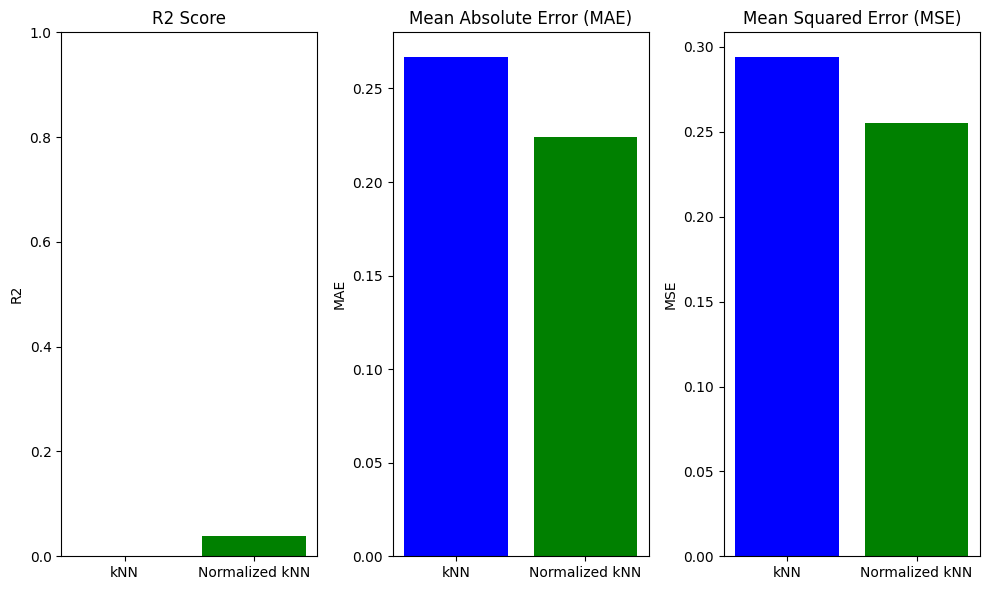

In [ ]:
import matplotlib.pyplot as plt

# Define metric values for non-normalized kNN
r2_non_normalized = r2  # Placeholder value
mae_non_normalized = mae   # Placeholder value
mse_non_normalized = mse  # Placeholder value

# Define metric values for normalized kNN
r2_normalized = r2_normal  # Value from your code
mae_normalized = mae_normal  # Value from your code
mse_normalized = mse_normal  # Value from your code

# Define models and corresponding metric values
models = ['kNN', 'Normalized kNN']
r2_values = [r2_non_normalized, r2_normalized]
mae_values = [mae_non_normalized, mae_normalized]
mse_values = [mse_non_normalized, mse_normalized]

# Create bar plots for each metric
plt.figure(figsize=(10, 6))

# R2
plt.subplot(1, 3, 1)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R2 Score')
plt.ylabel('R2')
plt.ylim(0, 1)

# MAE
plt.subplot(1, 3, 2)
plt.bar(models, mae_values, color=['blue', 'green'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# MSE
plt.subplot(1, 3, 3)
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


Judging from the results our normalized results are better than without normalization

In [ ]:
# non-normalized w-kNN
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regress_weighted_kNN(new_example, train_data, k):
    # Make a copy of the training set
    train_data_copy = train_data.copy()

    # Compute the distance between new_example and each example in the training set
    train_data_copy['distance'] = np.sqrt(
        (new_example['BASEL_cloud_cover'] - train_data_copy['BASEL_cloud_cover']) ** 2 +
        (new_example['BASEL_humidity'] - train_data_copy['BASEL_humidity']) ** 2 +
        (new_example['BASEL_pressure'] - train_data_copy['BASEL_pressure']) ** 2 +
        (new_example['BASEL_global_radiation'] - train_data_copy['BASEL_global_radiation']) ** 2)

    # Compute weights (inverse of the distance)
    train_data_copy['weight'] = 1 / train_data_copy['distance']

    # Handle division by zero
    train_data_copy.loc[train_data_copy['weight'] == np.inf, 'weight'] = np.nan

    # Sort the training data by distance
    sorted_data = train_data_copy.sort_values(['distance'])

    # Compute the weighted mean of the 'BASEL_precipitation' column for the k nearest neighbors
    prediction = np.average(sorted_data.iloc[:k]['BASEL_precipitation'], weights=sorted_data.iloc[:k]['weight'])

    # Regression metric: Mean Absolute Error (MAE)
    actual_values = new_example['BASEL_precipitation']
    mae_weighted_nonNormalized = mean_absolute_error([actual_values] * k, sorted_data.iloc[:k]['BASEL_precipitation'])
    r2_weighted_nonNormalized = r2_score([actual_values] * k, sorted_data.iloc[:k]['BASEL_precipitation'])
    mse_weighted_nonNormalized = mean_squared_error([actual_values] * k, sorted_data.iloc[:k]['BASEL_precipitation'])

    print(f"Predicted value: {prediction:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_weighted_nonNormalized:.2f}")
    print(f"R-squared (R²): {r2_weighted_nonNormalized:.2f}")
    print(f"Mean Squared Error (MSE): {mse_weighted_nonNormalized:.2f}")

    return prediction
new_example = {'BASEL_cloud_cover': 4, 'BASEL_humidity': 0.81,  'BASEL_pressure': 1.00, 'BASEL_global_radiation': 0.67,'BASEL_precipitation':0.07}
train_data = pd.DataFrame({
    'BASEL_cloud_cover': [3, 5, 4, 2, 4],
    'BASEL_humidity': [0.7, 0.8, 0.5, 0.1, 0.2],
    'BASEL_pressure': [1.012, 1.010, 1.008, 1.015, 1.005],
    'BASEL_global_radiation': [0.2, 0.9, 0.15, 0.55, 0.31],
    'BASEL_precipitation': [0, 0.68, 0, 0.78, 0.11]})
k = 5

regression_result = regress_weighted_kNN(new_example, train_data, k)

Predicted value: 0.22
Mean Absolute Error (MAE): 0.30
R-squared (R²): 0.00
Mean Squared Error (MSE): 0.18


In [ ]:
# Normalized W-kNN
from sklearn.preprocessing import StandardScaler

def regress_weighted_kNN_normalized(new_example, train_data, k):
    # Copy the training set
    train_data_copy = train_data.copy()

    # Extract feature names
    feature_names = train_data_copy.drop(columns=['BASEL_precipitation']).columns.tolist()

    # Normalize the features
    scaler = StandardScaler()
    train_data_normalized = scaler.fit_transform(train_data_copy.drop(columns=['BASEL_precipitation']))
    new_example_normalized = scaler.transform([list(new_example.values())[:-1]])[0]

    # Create DataFrame after normalization with feature names
    train_data_normalized_df = pd.DataFrame(train_data_normalized, columns=feature_names)

    # Compute the Euclidean distance between new_example and each example in the training set
    distances = np.sqrt(np.sum((new_example_normalized - train_data_normalized_df.values) ** 2, axis=1))

    # Compute weights (inverse of the distance)
    weights = 1 / distances

    # Handle division by zero
    weights[weights == np.inf] = np.nan

    # Sort the training data by distance and select k nearest neighbors
    sorted_indices = distances.argsort()[:k]
    nearest_neighbors = train_data_copy.iloc[sorted_indices]

    # Compute the weighted mean of the 'BASEL_precipitation' column for the k nearest neighbors
    prediction = np.average(nearest_neighbors['BASEL_precipitation'], weights=weights[sorted_indices])

    # Calculate evaluation metrics
    actual_values = new_example['BASEL_precipitation']
    mae_weighted_normal = mean_absolute_error([actual_values] * k, nearest_neighbors['BASEL_precipitation'])
    r2_weighted_normal = r2_score([actual_values] * k, nearest_neighbors['BASEL_precipitation'])
    mse_weighted_normal = mean_squared_error([actual_values] * k, nearest_neighbors['BASEL_precipitation'])

    print(f"Predicted value: {prediction:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_weighted_normal:.2f}")
    print(f"R-squared (R²): {r2_weighted_normal:.2f}")
    print(f"Mean Squared Error (MSE): {mse_weighted_normal:.2f}")

    return prediction

# Example usage
new_example = {'BASEL_cloud_cover': 4, 'BASEL_humidity': 0.81,  'BASEL_pressure': 1.00, 'BASEL_global_radiation': 0.67,'BASEL_precipitation':0.07}
train_data = pd.DataFrame({
    'BASEL_cloud_cover': [3, 5, 4, 2, 4],
    'BASEL_humidity': [0.7, 0.8, 0.5, 0.1, 0.2],
    'BASEL_pressure': [1.012, 1.010, 1.008, 1.015, 1.005],
    'BASEL_global_radiation': [0.2, 0.9, 0.15, 0.55, 0.31],
    'BASEL_precipitation': [0, 0.68, 0, 0.78, 0.11]
})

k = 5

regression_result_normalized = regress_weighted_kNN_normalized(new_example, train_data, k)





Predicted value: 0.28
Mean Absolute Error (MAE): 0.30
R-squared (R²): 0.00
Mean Squared Error (MSE): 0.18


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# non-normalized decision tree
# decision tree with default paramters
dt = tree.DecisionTreeRegressor(max_depth=5)

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("MSE:", metrics.mean_squared_error(test_sln, predictions))
print("MAE:", metrics.mean_absolute_error(test_sln, predictions))
print("R^2:", metrics.r2_score(test_sln, predictions))

MSE: 0.37675543398822003
MAE: 0.24883582637303428
R^2: -0.4190265725604605


In [ ]:
# Fine Tune Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def optimize_decision_tree(train_data, train_sln, test_data, test_sln, depths):
    # Define the parameter grid
    param_grid = {'max_depth': depths}

    # Initialize the decision tree regressor
    dt = DecisionTreeRegressor()

    # Perform grid search using cross-validation
    grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_data, train_sln)

    # Get the best estimator
    best_dt = grid_search.best_estimator_

    # Train the best model on the entire training set
    best_dt.fit(train_data, train_sln)

    # Make predictions on the test set
    predictions = best_dt.predict(test_data)

    # Evaluate the model performance
    mse = mean_squared_error(test_sln, predictions)
    mae = mean_absolute_error(test_sln, predictions)
    r2 = r2_score(test_sln, predictions)

    print("Best Depth:", best_dt.get_params()['max_depth'])
    print("MSE:", mse)
    print("MAE:", mae)
    print("R^2:", r2)

    return best_dt, mse, mae, r2

# Define the range of depths to explore
depths = range(1, 11)

# Perform optimization
best_model, mse, mae, r2 = optimize_decision_tree(train_data, train_sln, test_data, test_sln, depths)


Best Depth: 2
MSE: 0.21433629164696524
MAE: 0.24182607279544194
R^2: 0.19271531111978035


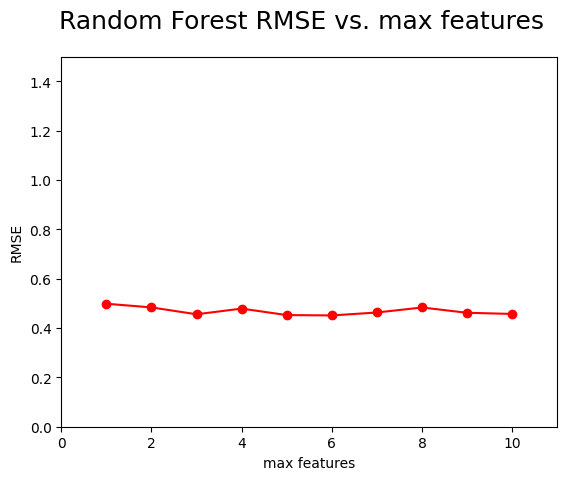

In [ ]:
#non-normalized randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def tune_max_features(max_features_values):
    rf_errors = []

    for m in max_features_values:
        curr_rf = RandomForestRegressor(n_estimators=10, max_features=m, random_state=31, n_jobs=-1)
        curr_rf.fit(train_data, train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_error = np.sqrt(mean_squared_error(test_sln, curr_predictions))
        rf_errors.append(curr_error)

    plt.suptitle('Random Forest RMSE vs. max features', fontsize=18)
    plt.xlabel('max features')
    plt.ylabel('RMSE')
    plt.plot(max_features_values, rf_errors, 'ro-')
    plt.axis([0, max_features_values[-1]+1, 0, np.max(rf_errors)+1])

    plt.show()

tune_max_features(range(1,11))


**kNN vs. Normalized kNN:**

- The kNN model with 3 neighbors on the normalized data performed better than the non-normalized kNN in terms of all evaluation metrics (R2, MAE, MSE). This suggests that normalizing the data improved the model's performance, indicating that the scale of the features was affecting the kNN algorithm.

- After fine-tuning, the best kNN model had 10 neighbors and achieved further improvement in R2, MAE, and MSE compared to the initial kNN models, showing that adjusting the number of neighbors can enhance performance.

**Weighted kNN vs. Normalized Weighted kNN:**

- Both the weighted kNN and normalized weighted kNN models had similar performance in terms of R2 and MSE, with R2 being close to 0 and MSE being relatively low. The MAE for both models was also similar, indicating that the predictions were consistently off by a certain margin. This suggests that the weighted kNN approach didn't significantly improve the model.

**Decision Tree vs. Fine-tuned Decision Tree:**

- The decision tree model initially performed poorly, with negative R2 and relatively high MSE and MAE. This suggests that the default decision tree parameters might not have been suitable for the data, resulting in overfitting or poor generalization. After fine-tuning the decision tree by adjusting the maximum depth, the model's performance improved significantly. The best depth was found to be 2, and the fine-tuned decision tree achieved positive R2 and lower MSE and MAE compared to the initial decision tree model.

**Bumps in the Road: **

- Couldnt normalized the decision tree data
- Couldnt normalized the Random Forest data